### Chargement des bibliothèques et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
import warnings
import datetime
import time
import re

In [2]:
# Monter Google Drive dans Google Colab pour y accéder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Accéder au répertoire où se trouve votre fichier "application_train.csv"
import os
os.chdir('/content/drive/My Drive')

# Vérifier que le fichier "application_train.csv" est présent dans le répertoire
!ls

# Charger le fichier "application_train.csv" en utilisant pandas
import pandas as pd

# Charger le dataset
application_train = pd.read_csv('application_train.csv')
application_train.head()


Mounted at /content/drive
 app1.ipynb					      mlruns
 app1.py					      modele_catboost.ipynb
 app2.py					      modele_catboost.pkl
 app_entrainé.py				     'Modélisation (1).ipynb'
 app.ipynb					      Modélisation.ipynb
 application_test.csv				      mon_app.py
 application_train.csv				      Notebook_1_2-2.ipynb
 app.msa.ipynb					     'Notebook 5.ipynb'
 bureau_balance.csv				     'Notebook 7.ipynb'
 bureau.csv					     'P3 divers'
 catboost_info					      POS_CASH_balance.csv
'Colab Notebooks'				      previous_application.csv
 credit_card_balance.csv			      sample_submission.csv
 data_test.csv					      Untitled
 data_train.csv					      Untitled0.ipynb
 Drifiting_alternatvies.ipynb			      X_test.csv
 HomeCredit_columns_description.csv		      X_test_reduit.csv
 Implémentez_un_modèle_de_scoring_azizi_mohamed.zip   X_train.csv
 installments_payments.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Charger application_testf
drive.mount('/content/drive', force_remount=True)

import os
os.chdir('/content/drive/My Drive')

!ls
application_test = pd.read_csv('application_test.csv')
application_test.head()




Mounted at /content/drive
 app1.ipynb					      mlruns
 app1.py					      modele_catboost.ipynb
 app2.py					      modele_catboost.pkl
 app_entrainé.py				     'Modélisation (1).ipynb'
 app.ipynb					      Modélisation.ipynb
 application_test.csv				      mon_app.py
 application_train.csv				      Notebook_1_2-2.ipynb
 app.msa.ipynb					     'Notebook 5.ipynb'
 bureau_balance.csv				     'Notebook 7.ipynb'
 bureau.csv					     'P3 divers'
 catboost_info					      POS_CASH_balance.csv
'Colab Notebooks'				      previous_application.csv
 credit_card_balance.csv			      sample_submission.csv
 data_test.csv					      Untitled
 data_train.csv					      Untitled0.ipynb
 Drifiting_alternatvies.ipynb			      X_test.csv
 HomeCredit_columns_description.csv		      X_test_reduit.csv
 Implémentez_un_modèle_de_scoring_azizi_mohamed.zip   X_train.csv
 installments_payments.csv


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Répartition des données  de la variable TARGET

In [4]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

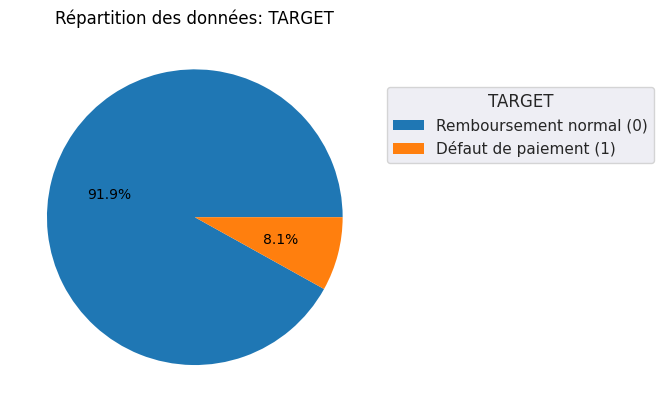

In [5]:
# Données de la variable TARGET
target_counts = application_train['TARGET'].value_counts()

# Créez une liste d'étiquettes pour la légende
labels = ['Remboursement normal (0)', 'Défaut de paiement (1)']

# Répartition des données de la variable TARGET
plt.title('Répartition des données: TARGET', size=12)
wedges, texts, autotexts = plt.pie([target_counts[0], target_counts[1]],
                                   autopct='%1.1f%%', textprops={'fontsize': 10, 'color': 'Black'})

ax = plt.gca()
sns.set_theme()
ax.legend(wedges, labels,
          title='TARGET',
          loc="center left",
          fontsize=11,
          bbox_to_anchor=(1, 0, 1, 1.5))

plt.show()


On peut conclure que la majorité des clients n'ont pas des difficultés de paiement.